## Import necessary **libraries**

In [3]:
# Basic libraries
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import unique
from numpy import where
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import pyplot
import scipy.stats as ss
import math

In [4]:
# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

In [5]:
from xgboost import XGBRegressor

In [6]:
# Keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import graphviz

In [8]:
# Update openpyxl
!pip install openpyxl==3.0.5 --quiet


     |████████████████████████████████| 242 kB 7.4 MB/s 


In [9]:
!pip install shap==0.40.0 --quiet
import shap

     |████████████████████████████████| 564 kB 7.0 MB/s 


In [10]:
!pip install pdpbox --quiet
from pdpbox import pdp, get_dataset, info_plots

     |████████████████████████████████| 34.0 MB 102 kB/s 
     |████████████████████████████████| 13.1 MB 29.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [11]:
!pip install lime --quiet
import lime
import lime.lime_tabular

     |████████████████████████████████| 275 kB 7.2 MB/s 



---


## Dataset Description 

Source: https://www.kaggle.com/fedesoriano/the-boston-houseprice-data

**Context**
The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

Attribute Information
Input features in order:
* 1) CRIM: per capita crime rate by town
* 2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* 3) INDUS: proportion of non-retail business acres per town
* 4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* 5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
* 6) RM: average number of rooms per dwelling
* 7) AGE: proportion of owner-occupied units built prior to 1940
* 8) DIS: weighted distances to five Boston employment centres
* 9) RAD: index of accessibility to radial highways
* 10) TAX: full-value property-tax rate per $10,000 [$/10k]
* 11) PTRATIO: pupil-teacher ratio by town
* 12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* 13) LSTAT: % lower status of the population


**Output variable:**
* 1) MEDV: Median value of owner-occupied homes in $1000's [k$]


**Source**
StatLib - Carnegie Mellon University

**Relevant Papers**

* Harrison, David & Rubinfeld, Daniel. (1978). Hedonic housing prices and the demand for clean air. Journal of Environmental Economics and Management. 5. 81-102. 10.1016/0095-0696(78)90006-2. LINK

* Belsley, David A. & Kuh, Edwin. & Welsch, Roy E. (1980). Regression diagnostics: identifying influential data and sources of collinearity. New York: Wiley LINK

## Load Data

In [12]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# Read 
file_ = "/content/drive/MyDrive/hackathon/boston.csv"   # adapt this as needed to the file structure on your Google drive
df = pd.read_csv(file_,) # read in csv file

## EDA

In [14]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [15]:
# Shape of df
print("Shape", df.shape)

# Check data types
print(df.info())

Shape (506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [16]:
# Describe Dataset 
print("\n DESCRIBE\n",df.describe())


 DESCRIBE
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.1488

In [17]:
# Check Skewness
print("\n SKEWNESS\n",df.skew())


 SKEWNESS
 CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64


In [18]:
# Check kurtosis
print("\n kurtosis\n",df.kurtosis())


 kurtosis
 CRIM       37.130509
ZN          4.031510
INDUS      -1.233540
CHAS        9.638264
NOX        -0.064667
RM          1.891500
AGE        -0.967716
DIS         0.487941
RAD        -0.867232
TAX        -1.142408
PTRATIO    -0.285091
B           7.226818
LSTAT       0.493240
MEDV        1.495197
dtype: float64


CORRELATION MATRIX
              CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       

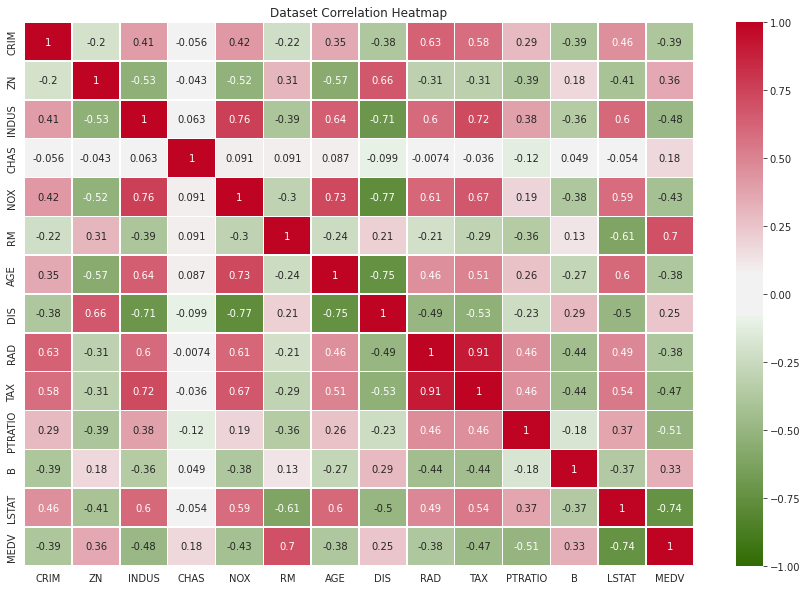



COVARIANCE MATRIX
                CRIM           ZN       INDUS      CHAS        NOX         RM  \
CRIM      73.986578   -40.215956   23.992339 -0.122109   0.419594  -1.325038   
ZN       -40.215956   543.936814  -85.412648 -0.252925  -1.396148   5.112513   
INDUS     23.992339   -85.412648   47.064442  0.109669   0.607074  -1.887957   
CHAS      -0.122109    -0.252925    0.109669  0.064513   0.002684   0.016285   
NOX        0.419594    -1.396148    0.607074  0.002684   0.013428  -0.024603   
RM        -1.325038     5.112513   -1.887957  0.016285  -0.024603   0.493671   
AGE       85.405322  -373.901548  124.513903  0.618571   2.385927  -4.751929   
DIS       -6.876722    32.629304  -10.228097 -0.053043  -0.187696   0.303663   
RAD       46.847761   -63.348695   35.549971 -0.016296   0.616929  -1.283815   
TAX      844.821538 -1236.453735  833.360290 -1.523367  13.046286 -34.583448   
PTRATIO    5.399331   -19.776571    5.692104 -0.066819   0.047397  -0.540763   
B       -302.381816

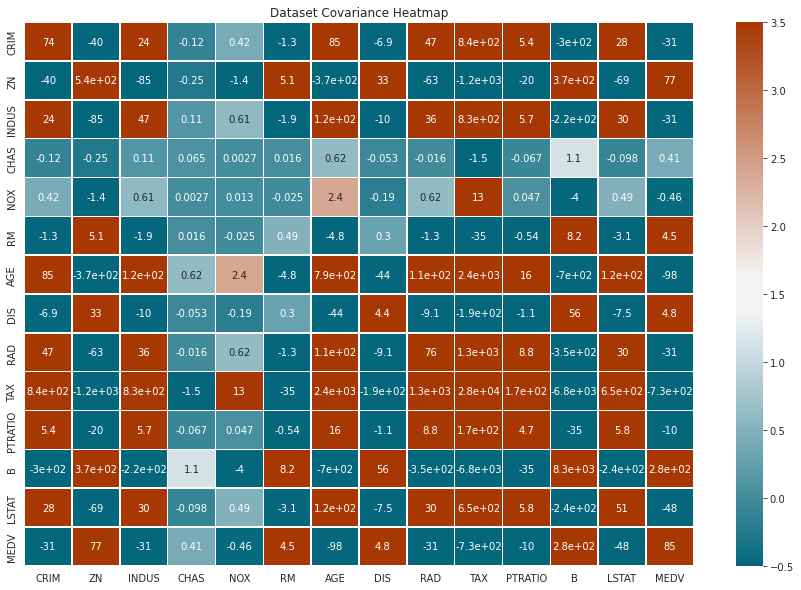

In [19]:
# Multivariate numerical descriptive statistics

#Correlation Matrix
print("CORRELATION MATRIX\n",df.corr())
print("\n\n")

#Correlation Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (15,10))
cmap = sns.diverging_palette(120, 10, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((df).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Dataset Correlation Heatmap")
plt.show()

# Covariance Matrix
print("\n\nCOVARIANCE MATRIX\n",df.cov())
print("\n\n")

#Covariance Matrix as a Heatmap

sns.set_style('darkgrid')
plt.figure(figsize = (15,10))
cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((df).cov(), vmin = -0.5, vmax = 3.5, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Dataset Covariance Heatmap")
plt.show()

In [20]:
print('\n Duplicates\n',df.duplicated().sum())


 Duplicates
 0


In [21]:
# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


## Preprocessing

there are categorical variables in this dataset, thus, dummy encoding no need to perform.

In [22]:
# split X and y
X = df.drop('MEDV', 1)
y = df[['MEDV']]

In [23]:
# Code for skewness correction (see source below)
# Depending upon the characteritics of a feature (column), a log, Box-Cox or power transform is applied to normalize the distribution 

# -*- coding: utf-8 -*-
"""
Created on Sat Feb 23 14:42:46 2019
@author: DATAmadness
"""

##################################################
# A function that will accept a pandas dataframe
# and auto-transforms columns that exceeds threshold value
#  -  Offers choice between boxcox or log / exponential transformation
#  -  Automatically handles negative values
#  -  Auto recognizes positive /negative skewness

# Further documentation available here:
# https://datamadness.github.io/Skewness_Auto_Transform

def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):
    
    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')
    
    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series
    
    
    #Go through desired columns in DataFrame
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()
        transformed = True
        
        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            #ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1 = sns.histplot(DF[col], ax=axes[0], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
            ax1.set(xlabel='Original ' + str(col))
        
        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply log transformation 
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
         
        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply exp transformation 
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
        
        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew
        
        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')     
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                #ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2 = sns.histplot(DF[col], ax=axes[1], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='Transformed ' + str(col))
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                #ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2 = sns.histplot(DF[col], ax=axes[1], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='NO TRANSFORM ' + str(col))
                plt.show()
                

    return DF


 ------------------------------------------------------

 'CRIM' had 'positive' skewness of 5.22

 Transformation yielded skewness of 0.09


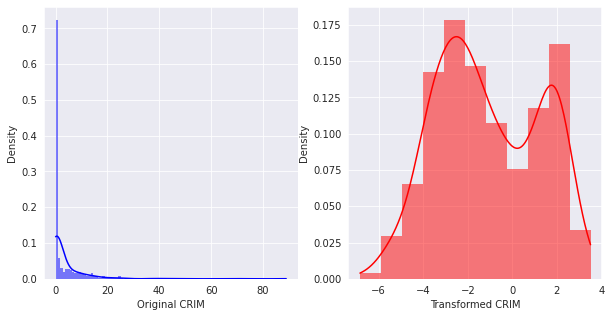


 ------------------------------------------------------

 'ZN' had 'positive' skewness of 2.23

 Transformation yielded skewness of 1.07


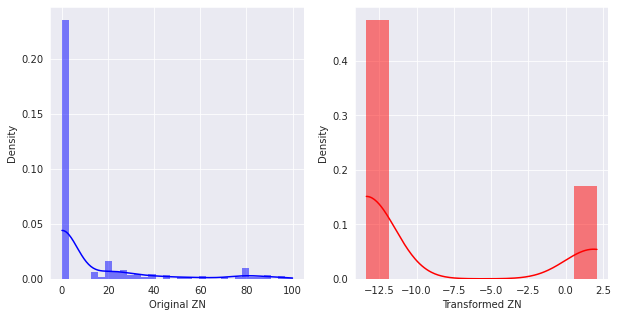


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'INDUS' . Skewness = 0.30


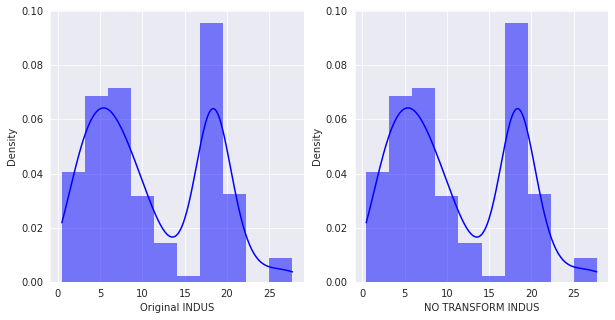


 ------------------------------------------------------

 'CHAS' had 'positive' skewness of 3.41

 Transformation yielded skewness of 3.41


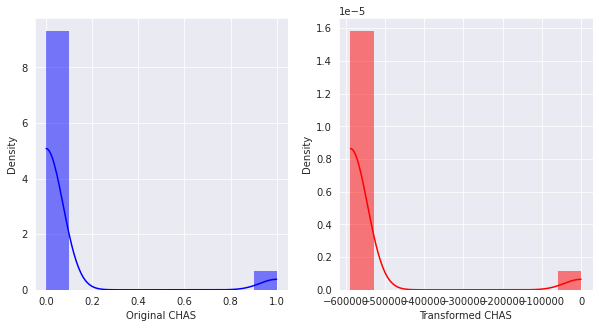


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'NOX' . Skewness = 0.73


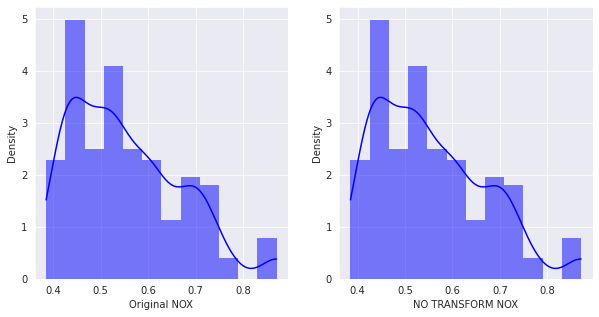


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'RM' . Skewness = 0.40


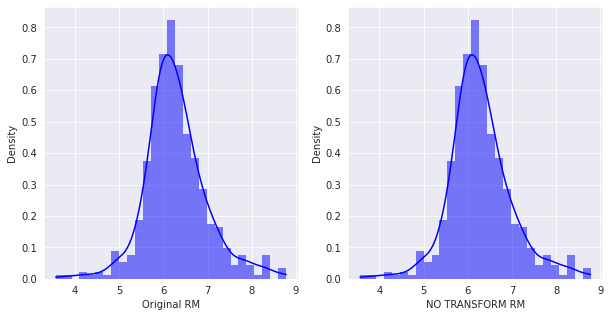


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'AGE' . Skewness = -0.60


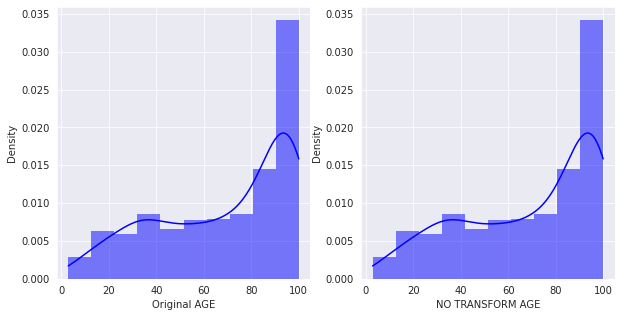


 ------------------------------------------------------

 'DIS' had 'positive' skewness of 1.01

 Transformation yielded skewness of 0.03


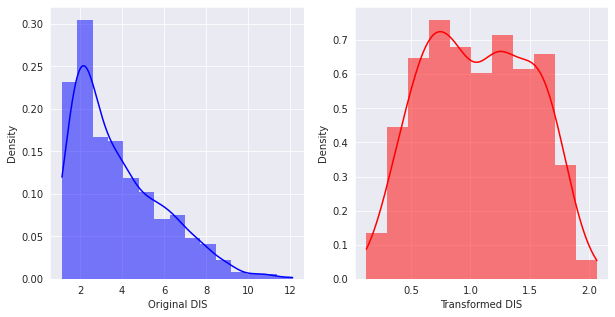


 ------------------------------------------------------

 'RAD' had 'positive' skewness of 1.00

 Transformation yielded skewness of 0.02


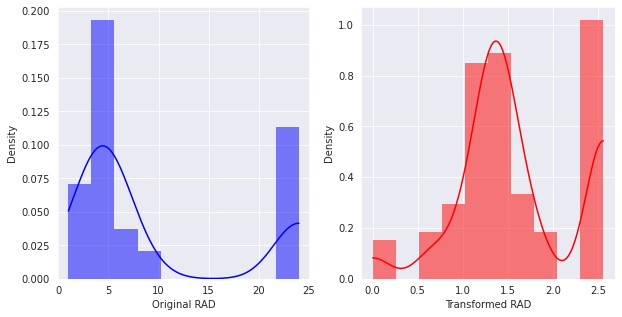


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'TAX' . Skewness = 0.67


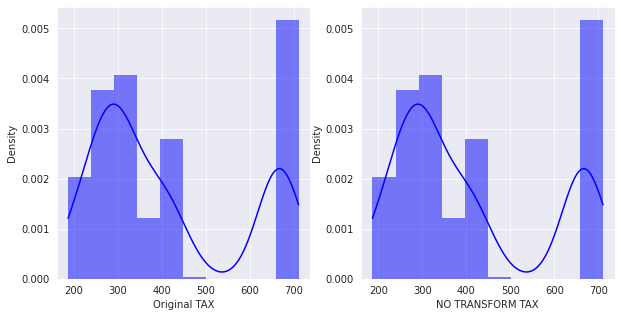


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'PTRATIO' . Skewness = -0.80


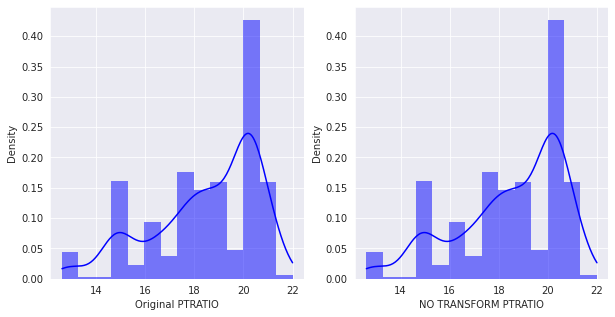


 ------------------------------------------------------

 'B' had 'negative' skewness of -2.89

 Transformation yielded skewness of -1.93


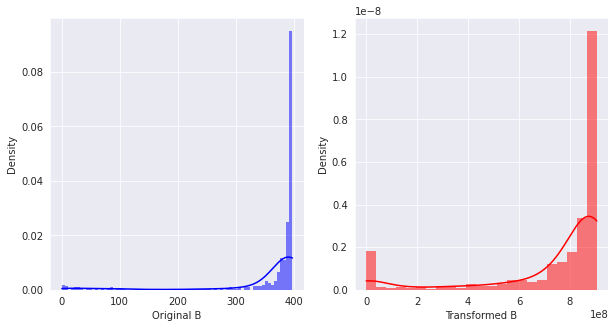


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'LSTAT' . Skewness = 0.91


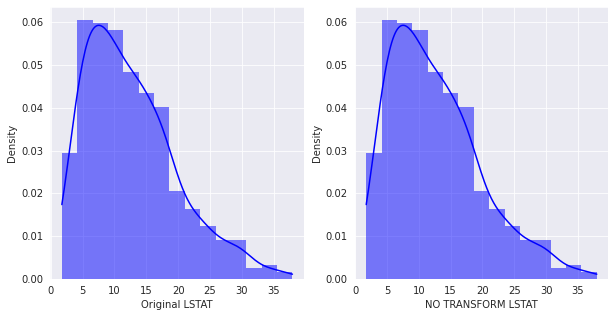

In [24]:
# Use code above (adapted from https://github.com/datamadness/Automatic-skewness-transformation-for-Pandas-DataFrame) to correct skewness
# All the predictors are real-valued, so we can push them all through the skewness check/correction.
X = skew_autotransform(X.copy(deep=True), plot = True, exp = False, threshold = 1)


 ------------------------------------------------------

 'MEDV' had 'positive' skewness of 1.11

 Transformation yielded skewness of 0.02


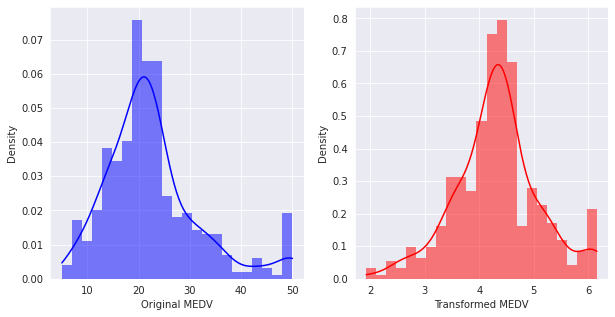

In [25]:
y = skew_autotransform(y.copy(deep=True), plot = True, exp = False, threshold = 1)

## Preprocessing Outliner

In [26]:
# Tukey Rule outliers
# As an alternative, you could use z-scores greater than 3 or less than -3.
from scipy.stats.mstats import winsorize

cols = X.columns
#Tukey's method
def tukey_rule(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_lim = data[col].quantile(0.5) + 2 * IQR
    lower_lim = data[col].quantile(0.5) - 2 * IQR
    outliers = []
    for index, x in enumerate(data[col]):
        if x < lower_lim or x >= upper_lim:
            outliers.append(index)
    return outliers

# Identify outliers
for i in cols:
  outliers_Tukey = tukey_rule(X,i)
  print("Column ",i,": ",outliers_Tukey)
  
# Windsorize X and check the results
print("Before", X.describe())
X_winsorized = X.copy(deep=True)
for i in cols:
  X_winsorized[i] = winsorize(X[i], limits=(0.05, 0.05))
print("After", X_winsorized.describe())

Column  CRIM :  []
Column  ZN :  []
Column  INDUS :  []
Column  CHAS :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 20

In [27]:
# Check skewness of target
y.skew(axis = 0, skipna = True)# Update result df with winzorized quant features

def windorized(self):
  for ls in self:
    df[ls]=X_winsorized[ls]

lists = ['CRIM','ZN','INDUS','CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD' ,'TAX', 'PTRATIO', 'B', 'LSTAT']


windorized(lists)

In [28]:
#Review columns
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## Model Building

#**Scaling & Holdout Sample**

In [29]:
# Create holdout sample
# Note: split before doing any trasformations on the data!!!

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2,    # 80-20 training vs test set split
                     random_state=0)
print('Shape of X and y',X.shape, y.shape, '\nShape of training set X and y',X_train.shape, y_train.shape, '\nShape of test set X and y',X_test.shape, y_test.shape) 


Shape of X and y (506, 13) (506, 1) 
Shape of training set X and y (404, 13) (404, 1) 
Shape of test set X and y (102, 13) (102, 1)


In [30]:
# Bringing features onto the same scale：normalization and standardization:

# Min-max scaling(Normalization) (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

# mms = MinMaxScaler()
# X_norm = mms.fit_transform(X)

# Standardization z-score  (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
# from sklearn.preprocessing import StandardScaler
stdsc1 = StandardScaler()  
X_train_std = stdsc1.fit_transform(X_train)
X_test_std = stdsc1.transform(X_test)
stdsc2 = StandardScaler()  
y_train_std = stdsc2.fit_transform(y_train)
y_test_std = stdsc2.transform(y_test)

In [31]:
# Ensdure training and test data are in pandas dataframes
X_train_std =  pd.DataFrame(X_train_std,columns = X.columns)
X_test_std = pd.DataFrame(X_test_std,columns = X.columns)
y_train_std = pd.DataFrame(y_train_std)
y_test_std = pd.DataFrame(y_test_std)

In [32]:
# Gridsearch a RandomForestRegressorRegressor some of the hyperparameter space
model = RandomForestRegressor(criterion='squared_error',random_state=1221)    
# define the grid of values to search
grid = dict()
grid['max_leaf_nodes']= [100, 200]
grid['max_depth']= [5, 7, 9]
grid['n_estimators'] = [400, 1000]
cv = RepeatedKFold(n_splits=3, n_repeats=2, random_state=192837465)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error')
grid_result = grid_search.fit(X_train_std, y_train_std)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.132658 using {'max_depth': 9, 'max_leaf_nodes': 100, 'n_estimators': 1000}
-0.144845 (0.027402) with: {'max_depth': 5, 'max_leaf_nodes': 100, 'n_estimators': 400}
-0.142921 (0.026591) with: {'max_depth': 5, 'max_leaf_nodes': 100, 'n_estimators': 1000}
-0.144845 (0.027402) with: {'max_depth': 5, 'max_leaf_nodes': 200, 'n_estimators': 400}
-0.142921 (0.026591) with: {'max_depth': 5, 'max_leaf_nodes': 200, 'n_estimators': 1000}
-0.135750 (0.027185) with: {'max_depth': 7, 'max_leaf_nodes': 100, 'n_estimators': 400}
-0.134169 (0.026661) with: {'max_depth': 7, 'max_leaf_nodes': 100, 'n_estimators': 1000}
-0.135750 (0.027185) with: {'max_depth': 7, 'max_leaf_nodes': 200, 'n_estimators': 400}
-0.134169 (0.026661) with: {'max_depth': 7, 'max_leaf_nodes': 200, 'n_estimators': 1000}
-0.134456 (0.027352) with: {'max_depth': 9, 'max_leaf_nodes': 100, 'n_estimators': 400}
-0.132658 (0.026728) with: {'max_depth': 9, 'max_leaf_nodes': 100, 'n_estimators': 1000}
-0.134450 (0.027368) with: {'ma

In [33]:
# Fit RandomForestRegressor on holdout sample
#regr = RandomForestRegressor(criterion ='squared_error',max_leaf_nodes=200,max_depth=9,n_estimators=400,random_state=1221)
regr = RandomForestRegressor(criterion='squared_error',random_state=1221, max_depth=9, max_leaf_nodes=200, n_estimators= 400)
regr.fit(X_train_std, np.ravel(y_train_std))
# Make predictions 
y_pred_train_std = regr.predict(X_train_std)
y_pred_std = regr.predict(X_test_std)
y_pred_std = pd.DataFrame(y_pred_std)
y_pred = stdsc2.inverse_transform(y_pred_std)
y_pred_train_std = pd.DataFrame(y_pred_train_std)
y_pred_std = pd.DataFrame(y_pred_std)
y_pred = pd.DataFrame(y_pred)

In [34]:
# record feature labels
Xcols = X.columns

#**Feature Importance with RandomForestRegressor Model**

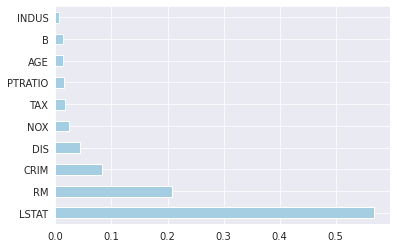

In [35]:
# Feature Importance using the builtin in RandomForestRegressor (based upon impurity analysis)
RF_feature_importances = pd.Series(regr.feature_importances_, index=Xcols)
RF_feature_importances.nlargest(10).plot(kind='barh')

#**Shapey Values with RandomForestRegressor Model**

  0%|          | 0/404 [00:00<?, ?it/s]

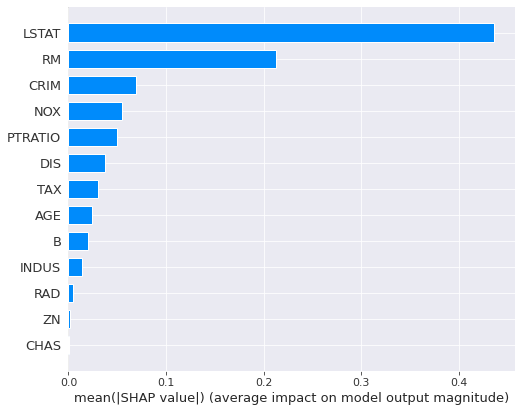

In [36]:
# Global (i.e., model-level) Shapley values
# explainer = shap.KernelExplainer(regr.predict, X_train_std)
explainer = shap.SamplingExplainer(regr.predict, X_train_std)
shap_values = explainer.shap_values(X_train_std)
shap.summary_plot(shap_values, X_train_std, plot_type='bar',feature_names=Xcols)

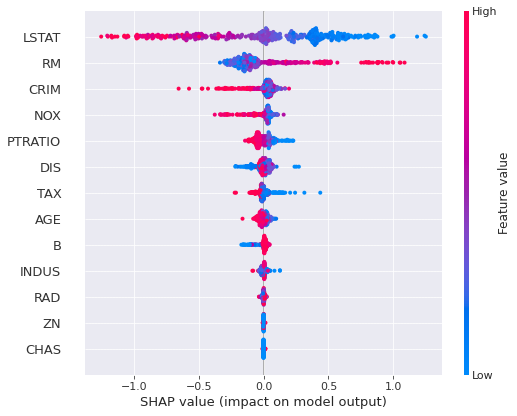

In [37]:
# Check direction of impact (local Shapley values)
shap.summary_plot(shap_values, X_train_std,feature_names=Xcols)

#**Partial Dependence Plots with RandomForestRegressor Model** 

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


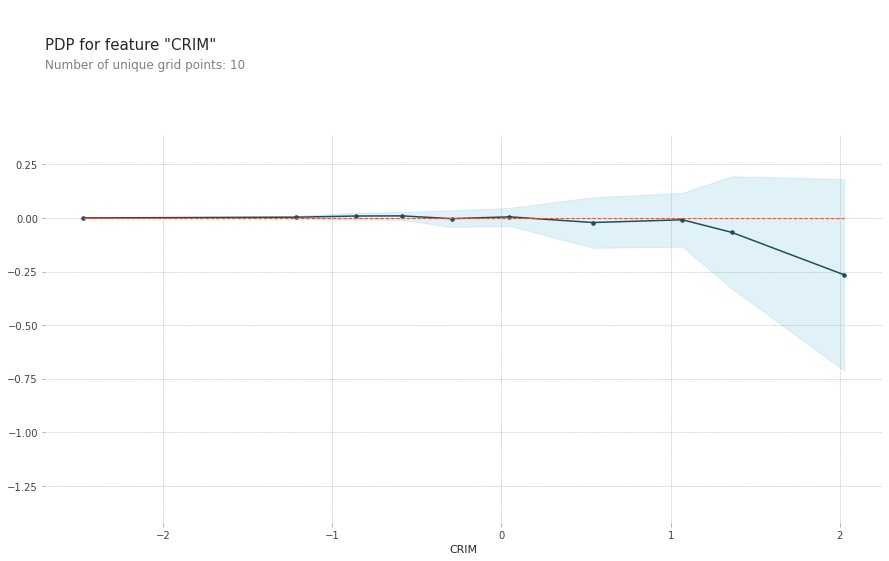

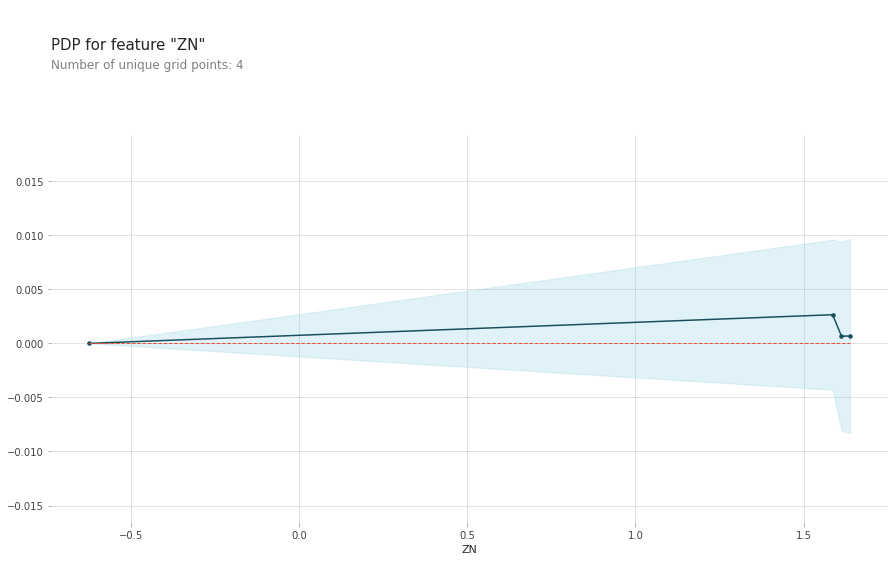

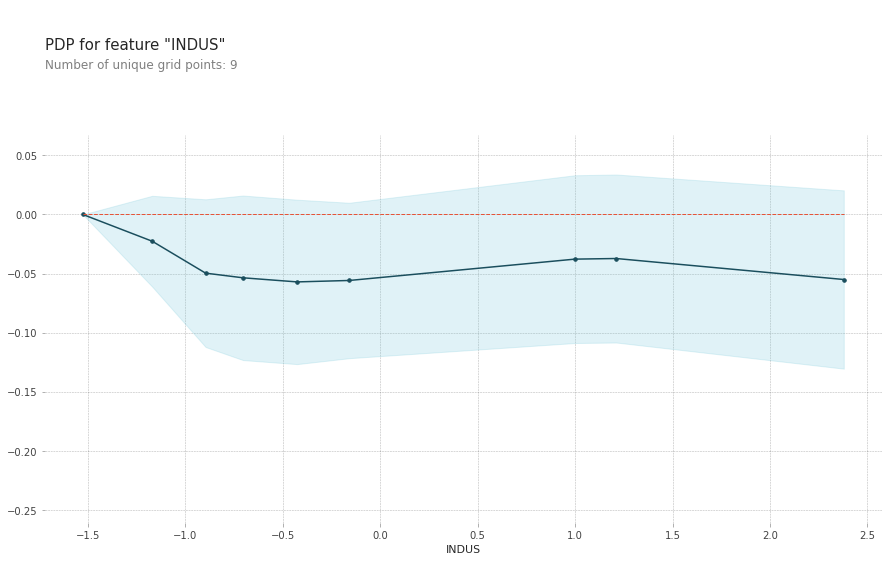

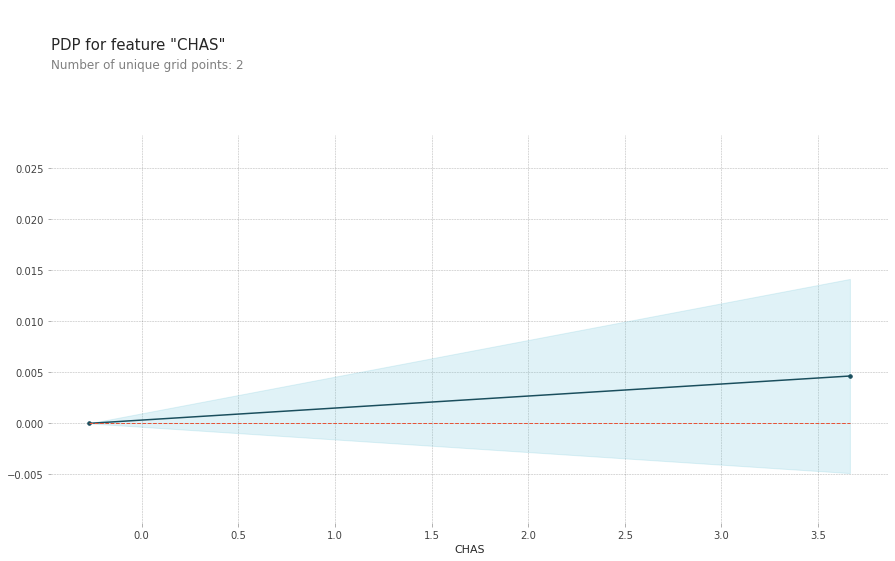

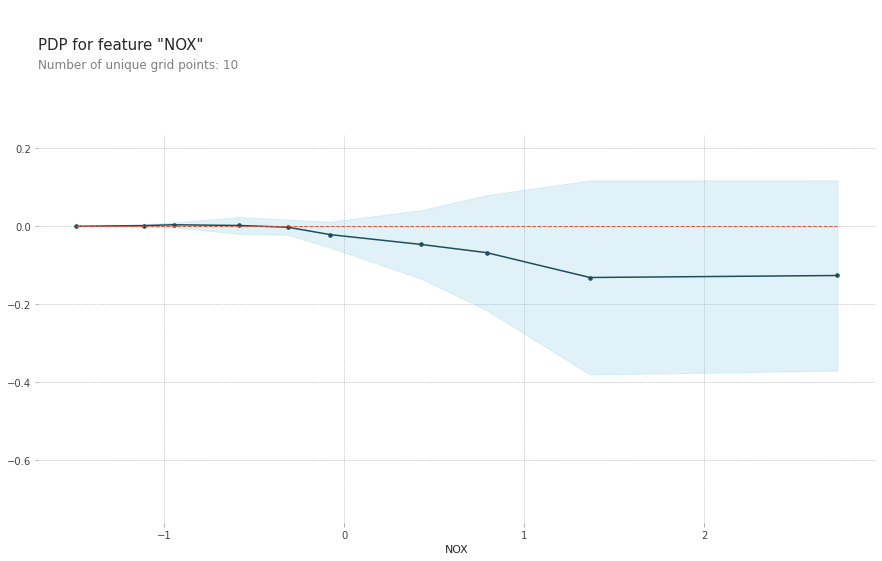

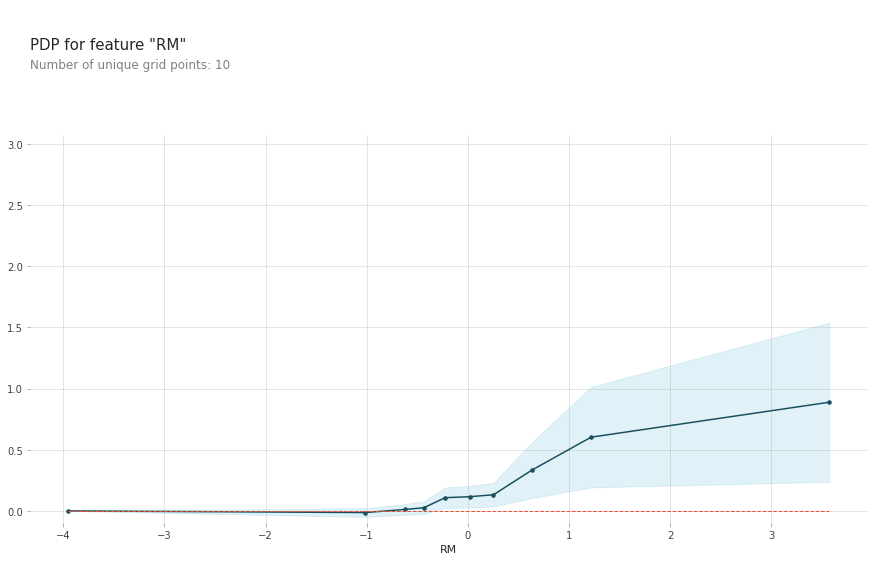

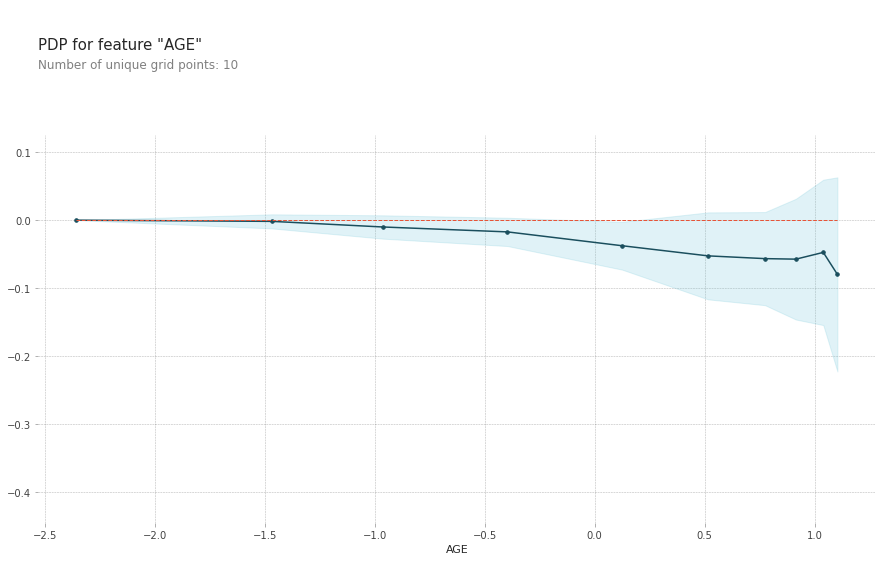

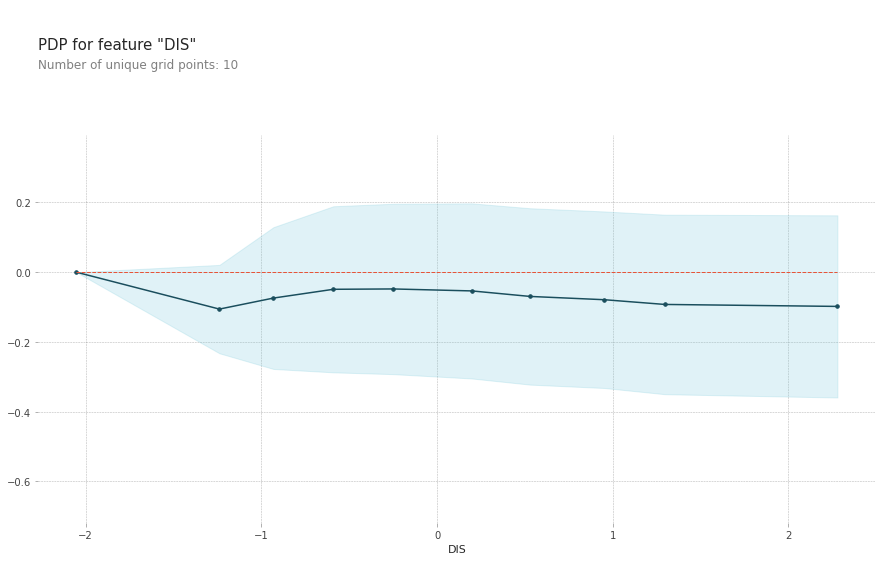

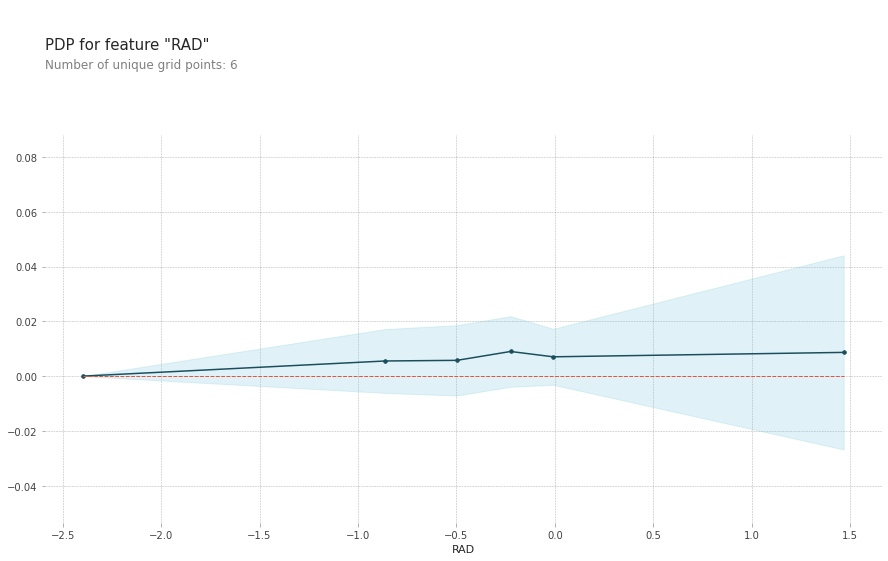

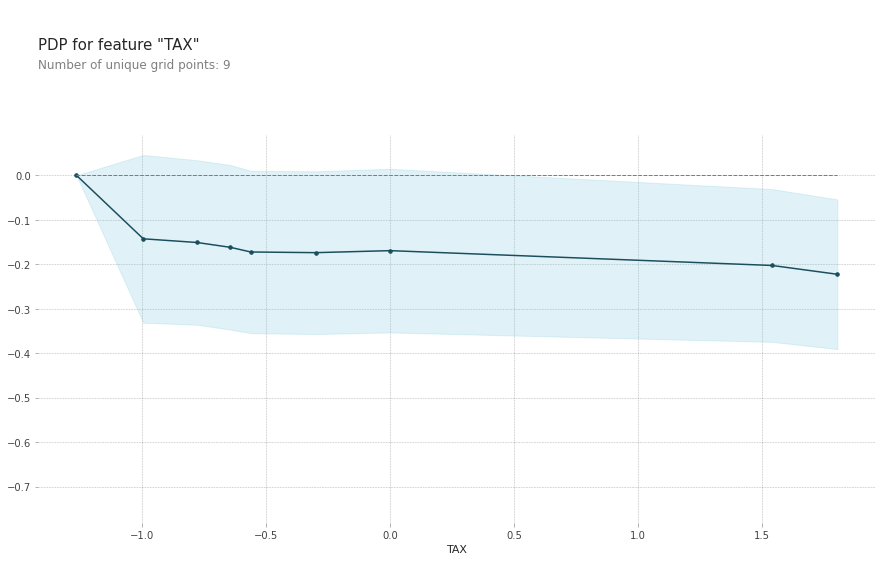

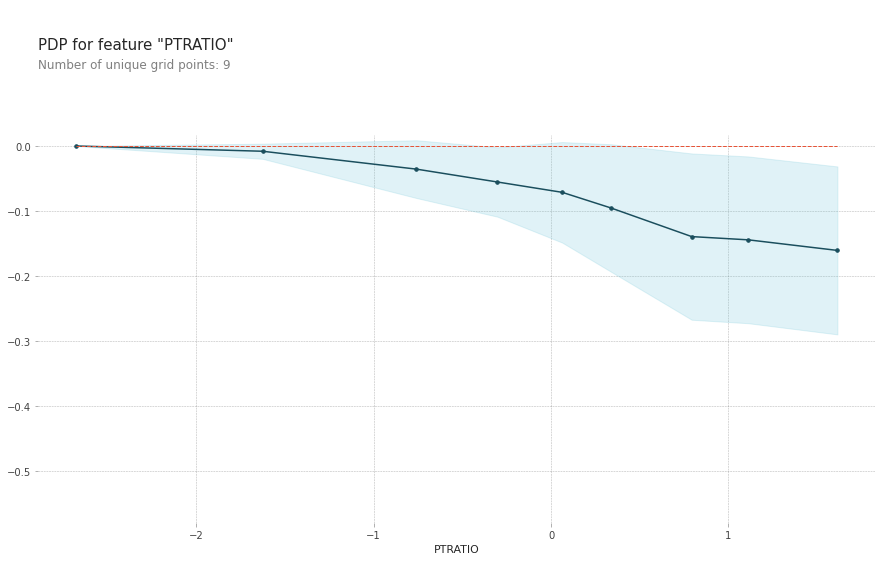

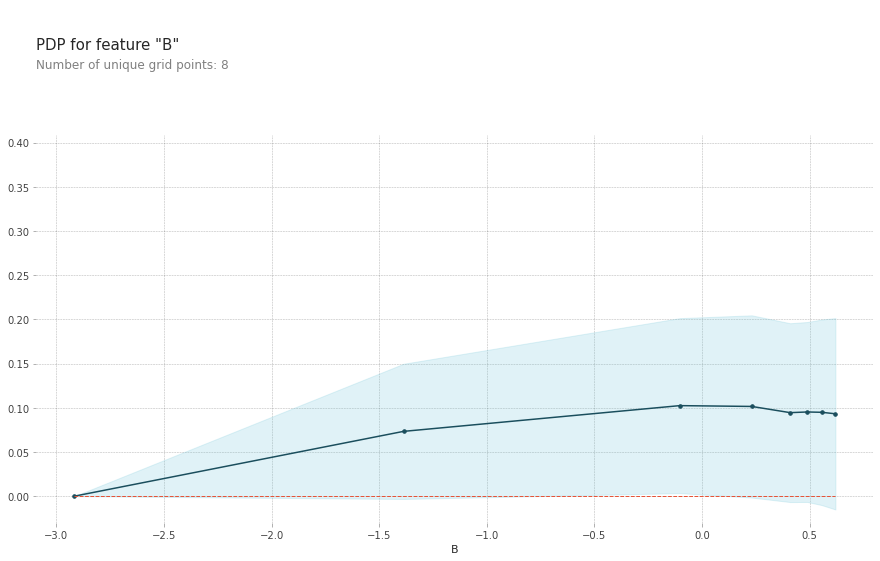

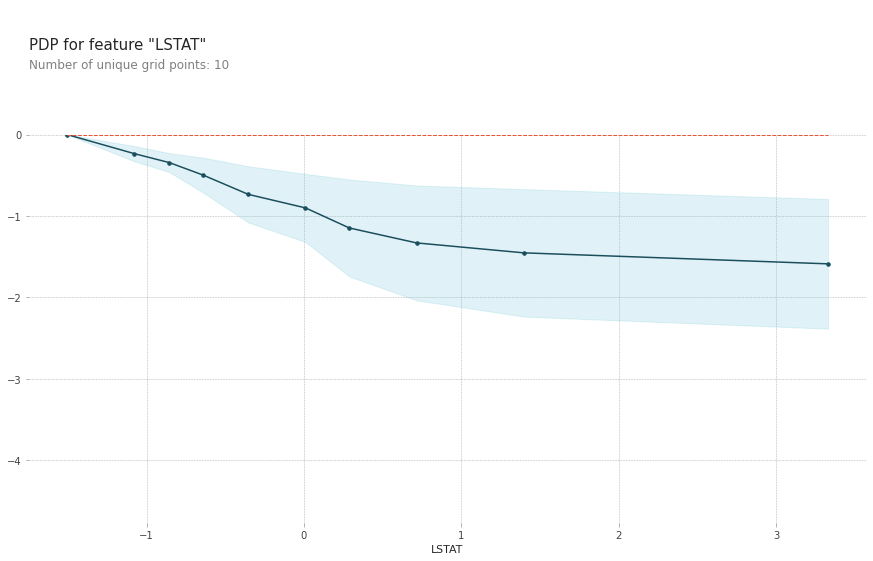

In [38]:
# PDPs
for i in X.columns:    
    pdp_ = pdp.pdp_isolate(model = regr, dataset = X_train_std, model_features = X.columns, feature = i, n_jobs=1) 
    pdp.pdp_plot(pdp_, str(i))
    plt.show()

Computing partial dependence and ICE plots...


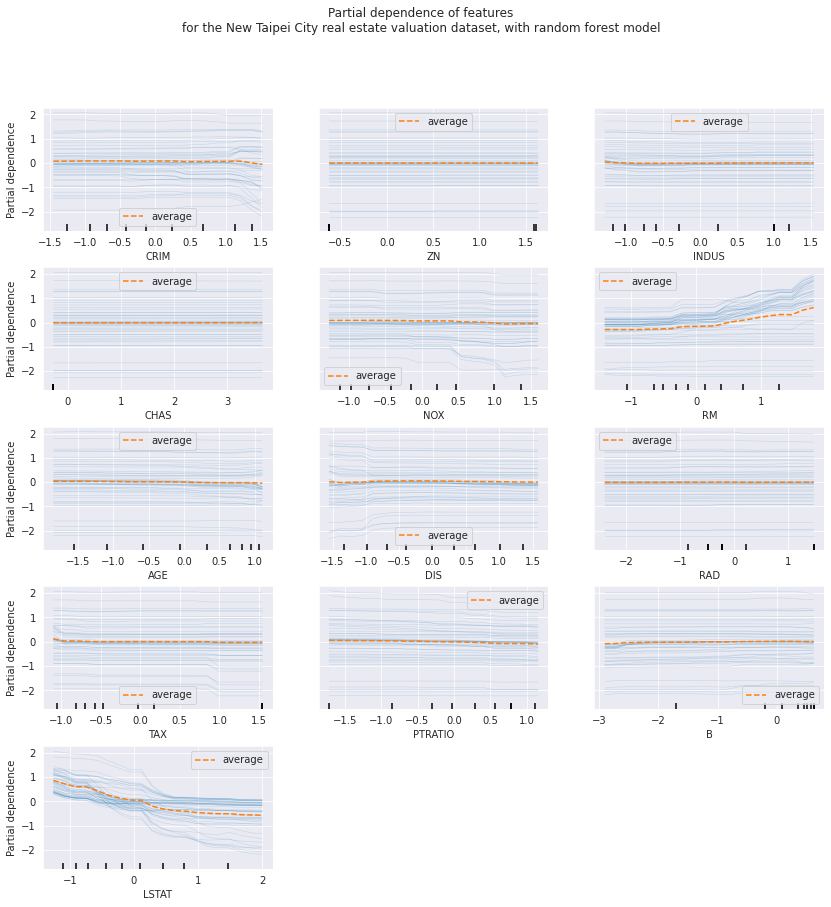

In [39]:
# Creare PDP & ICE plots
print("Computing partial dependence and ICE plots...")
features = X.columns
fig, ax = plt.subplots(figsize=(14, 14))
display = PartialDependenceDisplay.from_estimator(
    regr,
    X_train_std,
    features,
    kind="both",
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"}, ax=ax
)
display.figure_.suptitle(
    "Partial dependence of features\n"
    "for the New Taipei City real estate valuation dataset, with random forest model"
)
display.figure_.subplots_adjust(hspace=0.3)

In [40]:
# Review mean and standard deviation of X3_MRT feature
df.describe(include = ['float64'])

CRIM          ZN       INDUS           CHAS         NOX  \
count  506.000000  506.000000  506.000000     506.000000  506.000000   
mean    -1.078712   -9.335468   11.057648 -547075.169159    0.550513   
std      2.201651    6.734418    6.601417  149279.492195    0.104906   
min     -4.430313  -13.373080    2.180000 -587728.314092    0.409000   
25%     -2.891536  -13.373080    5.190000 -587728.314092    0.449000   
50%     -1.471371  -13.373080    9.690000 -587728.314092    0.538000   
75%      1.210442    1.585824   18.100000 -587728.314092    0.624000   
max      2.372201    2.058653   21.890000       0.009797    0.740000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.286486   68.899802    1.065660    1.626373  408.897233   18.500988   
std      0.584444   27.495342    0.430421    0.613294  166.460239    2.028046   
min      5.304000   17.700000    0.368026    0.660260  222.000000   14.700000   
25%      5.885500   45.025000    0.700785    1.258874  279.000000   17.400000   
50%      6.208500   77.500000    1.065900    1.439431  330.000000   19.050000   
75%      6.623500   94.075000    1.452413    2.559899  666.000000   20.200000   
max      7.610000  100.000000    1.760775    2.559899  666.000000   21.000000   

                  B       LSTAT        MEDV  
count  5.060000e+02  506.000000  506.000000  
mean   7.404965e+08   12.486403   22.532806  
std    2.627691e+08    6.589962    9.197104  
min    2.989238e+06    3.700000    5.000000  
25%    7.380613e+08    6.950000   17.025000  
50%    8.605182e+08   11.360000   21.200000  
75%    8.996883e+08   16.955000   25.000000  
max    9.053163e+08   26.820000   50.000000

#**LIME on RandomForestRegressor Model**



In [45]:
# LIME 
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_std.values, feature_names=X.columns, class_names=['Y_Price'], categorical_features=[], verbose=True, mode='regression')
i = 25   # Examining instance 25
exp = explainer.explain_instance(X_train_std.loc[i], regr.predict, num_features=7)
exp.show_in_notebook(show_table=True)
# print(f"The instance {i} standardized actual target value is {y_train_std[i]} and is predicted (on the standardized scale) by the RandomForestRegressor to be {y_pred_std.loc[i]}")


Intercept 0.4016764668948473
Prediction_local [-0.67693262]
Right: -0.28276018882534765


In [42]:
exp.as_list()

[('LSTAT > 0.60', -0.8459420918236681),
 ('RM <= -0.60', -0.25429640576925194),
 ('-0.47 < TAX <= 1.54', -0.0675287785899005),
 ('NOX <= -0.93', 0.0640813919055773),
 ('-0.78 < CRIM <= -0.14', 0.05718356735211602),
 ('-0.01 < B <= 0.45', 0.03717024835076028),
 ('-0.86 < INDUS <= -0.29', -0.0355133517283106)]

#**Surrogate Models for RandomForestRegressor Model**

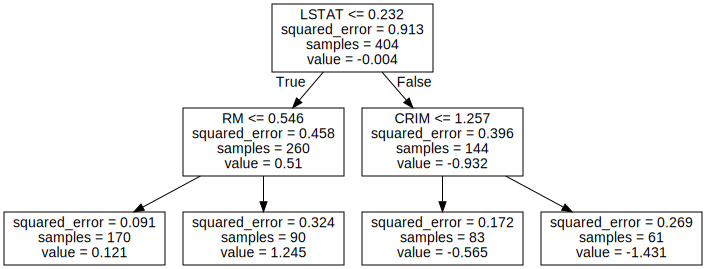

In [43]:
# Decision Tree surrogate for RandomForestRegressor model
from sklearn.tree import DecisionTreeRegressor
import graphviz

proxy = DecisionTreeRegressor(random_state = 20850,max_depth=2)    # Control the depth of the surrogate model tree here
proxy.fit(X_train_std,y_pred_train_std)

tree_graph = tree.export_graphviz(proxy, out_file = None, feature_names = Xcols)
graphviz.Source(tree_graph)

In [46]:
# Multiple Linear Regression surrogate model (for RandomForesRegerssor model)
import statsmodels.api as sm
model = sm.OLS(y_pred_train_std, X_train_std).fit()
predictions = model.predict(X_train_std) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      0   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.845
Method:                 Least Squares   F-statistic:                              170.7
Date:                Fri, 18 Mar 2022   Prob (F-statistic):                   4.05e-152
Time:                        12:56:22   Log-Likelihood:                         -171.35
No. Observations:                 404   AIC:                                      368.7
Df Residuals:                     391   BIC:                                      420.7
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#**XGBRegressor Model**

In [47]:
# Gridsearch an XGBoostRegressor hyperparameter space
model = XGBRegressor(objective ='reg:squarederror')    
# define the grid of values to search
grid = dict()
grid['learning_rate']= [.05, 0.07]
grid['max_depth']= [7, 9]
grid['n_estimators'] = [400]
cv = RepeatedKFold(n_splits=4, n_repeats=2, random_state=192837465)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error')
grid_result = grid_search.fit(X_train_std, y_train_std)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.128869 using {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 400}
-0.128869 (0.018257) with: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 400}
-0.130466 (0.018372) with: {'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 400}
-0.130731 (0.017084) with: {'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 400}
-0.128924 (0.023082) with: {'learning_rate': 0.07, 'max_depth': 9, 'n_estimators': 400}


In [48]:
# Fit XGBRegressor on holdout sample
regr = XGBRegressor(objective ='reg:squarederror',learning_rate=0.07,max_depth=7,n_estimators=400)
regr.fit(X_train_std, np.ravel(y_train_std))
# Make predictions 
y_pred_train_std = regr.predict(X_train_std)
y_pred_std = regr.predict(X_test_std)
y_pred_std = pd.DataFrame(y_pred_std)
y_pred = stdsc2.inverse_transform(y_pred_std)
y_pred_train_std = pd.DataFrame(y_pred_train_std)
y_pred_std = pd.DataFrame(y_pred_std)
y_pred = pd.DataFrame(y_pred)

#**Feature Importance with XGBRegressor Model**

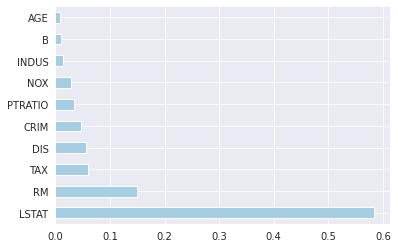

In [49]:
XGB_feature_importances = pd.Series(regr.feature_importances_, index=Xcols)
XGB_feature_importances.nlargest(10).plot(kind='barh')

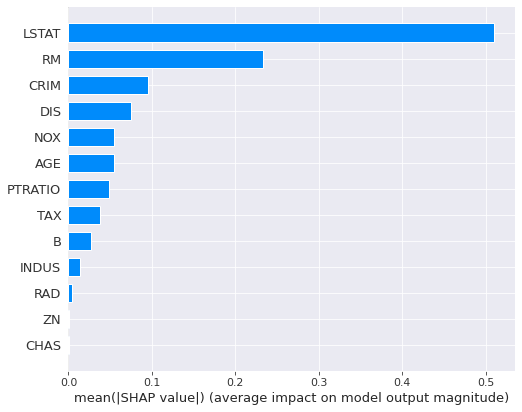

In [50]:
# Global (i.e., model-level) Shapley values
explainer = shap.TreeExplainer(regr)
shap_values = explainer.shap_values(X_train_std)
shap.summary_plot(shap_values, X_train_std, plot_type='bar',feature_names=Xcols)

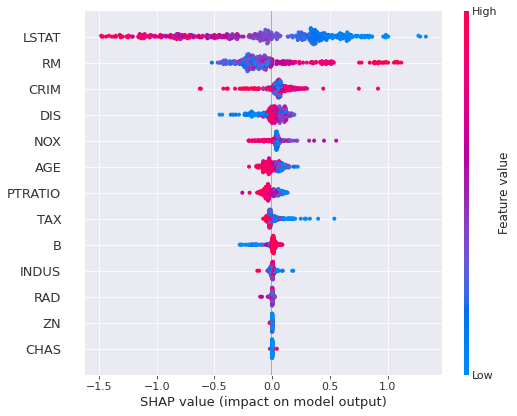

In [51]:
# Check direction of impact (local Shapley values)
shap.summary_plot(shap_values, X_train_std,feature_names=Xcols)

#**Partial Dependence Plots with XGBRegressor Model** 

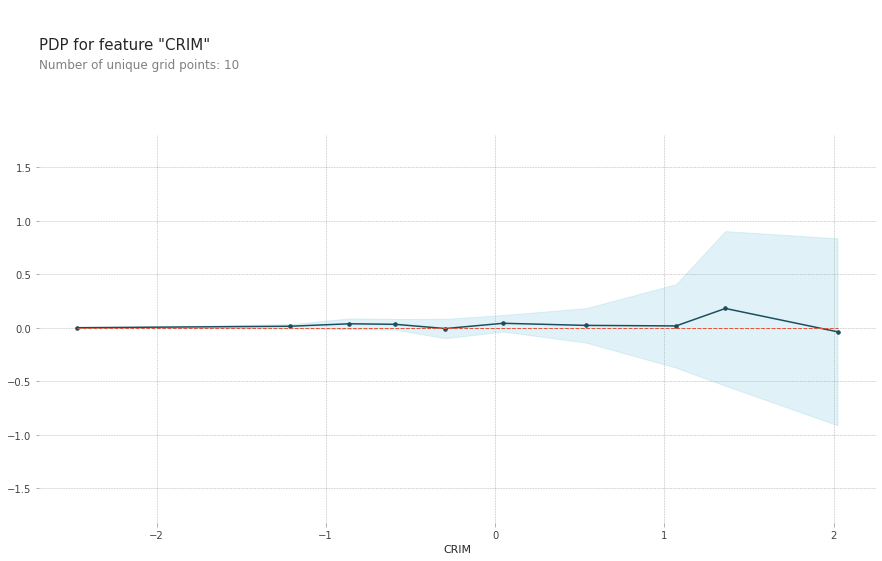

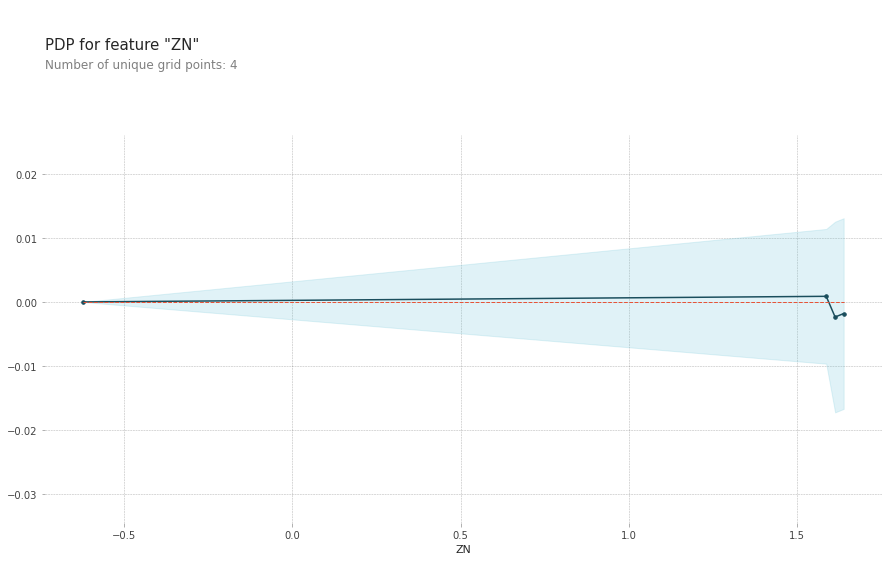

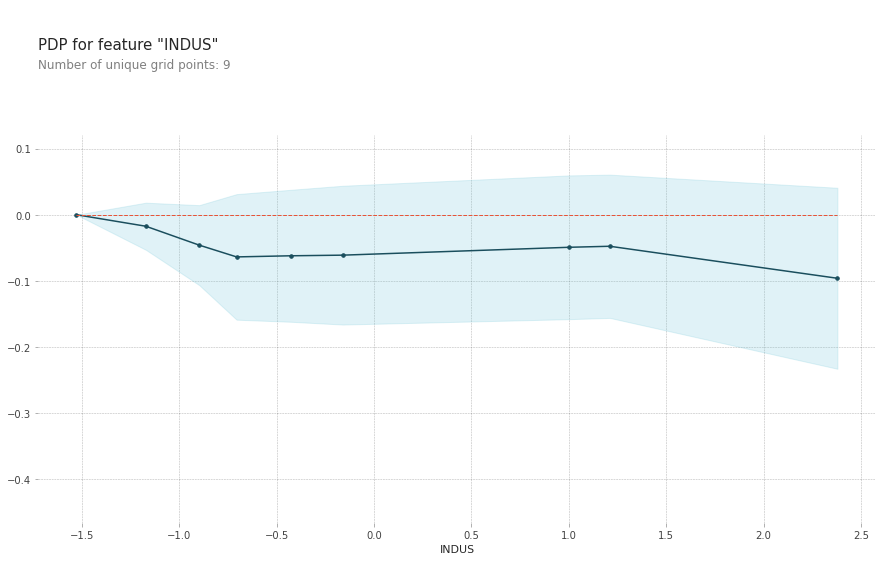

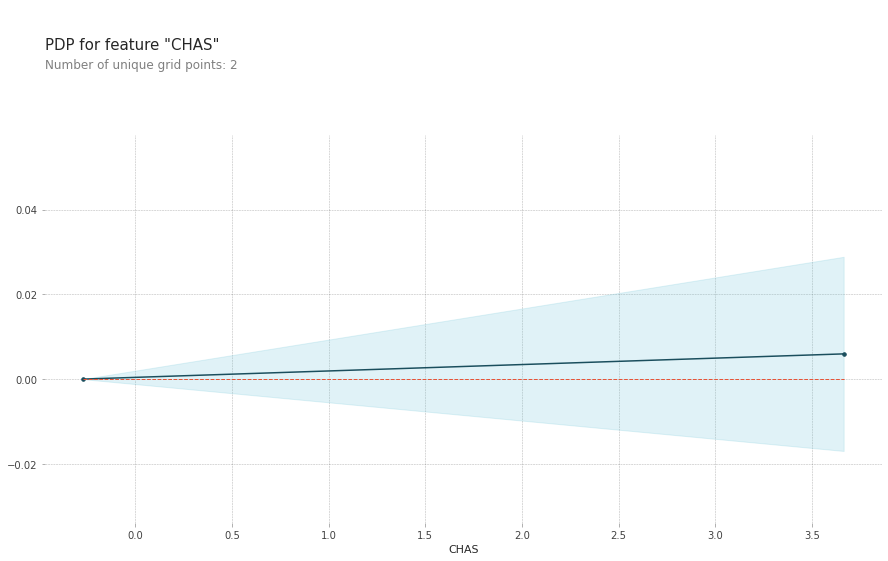

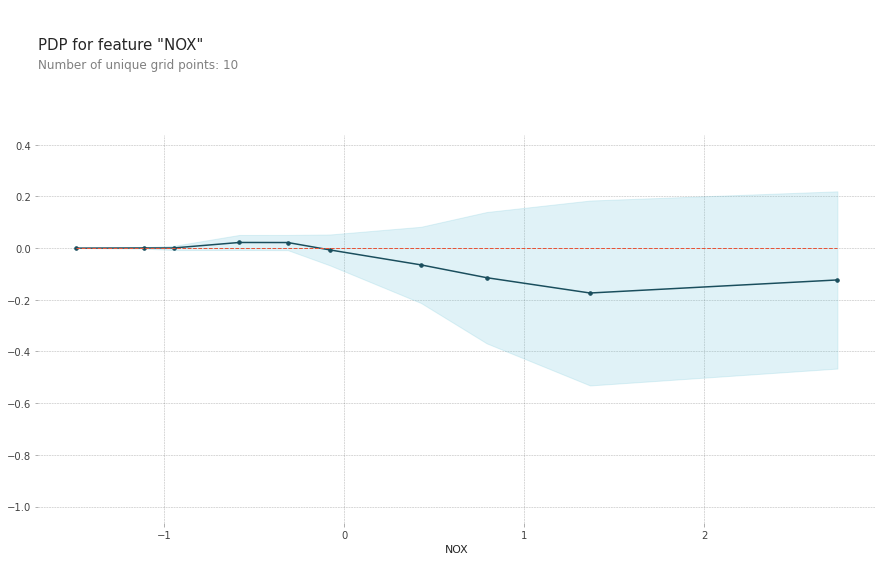

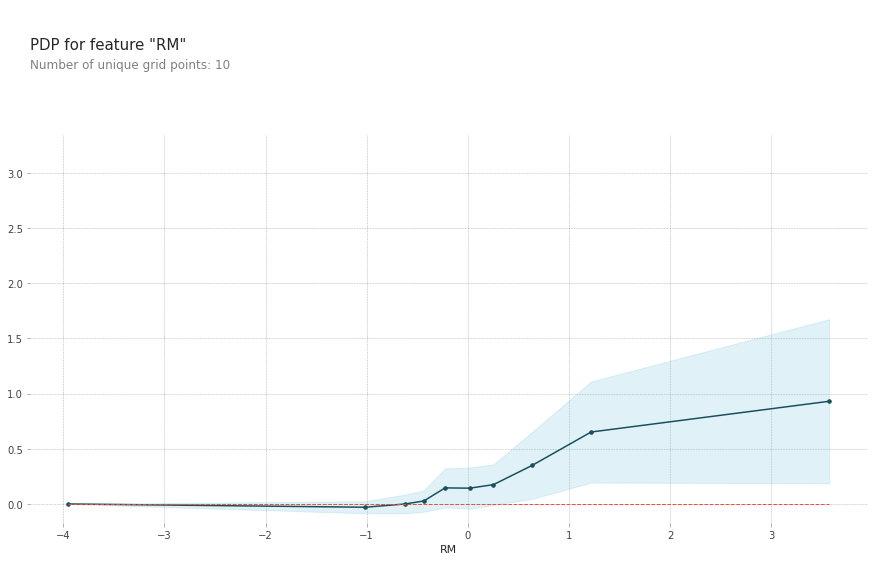

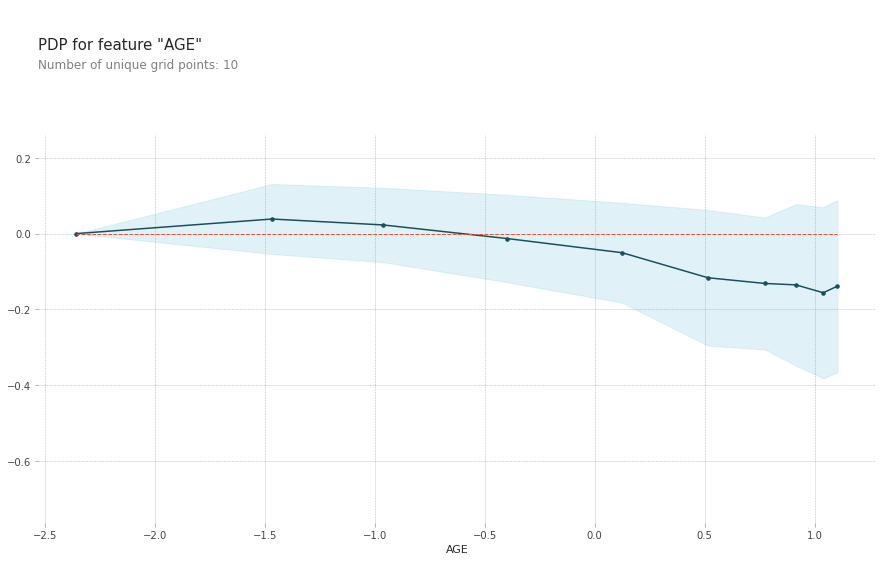

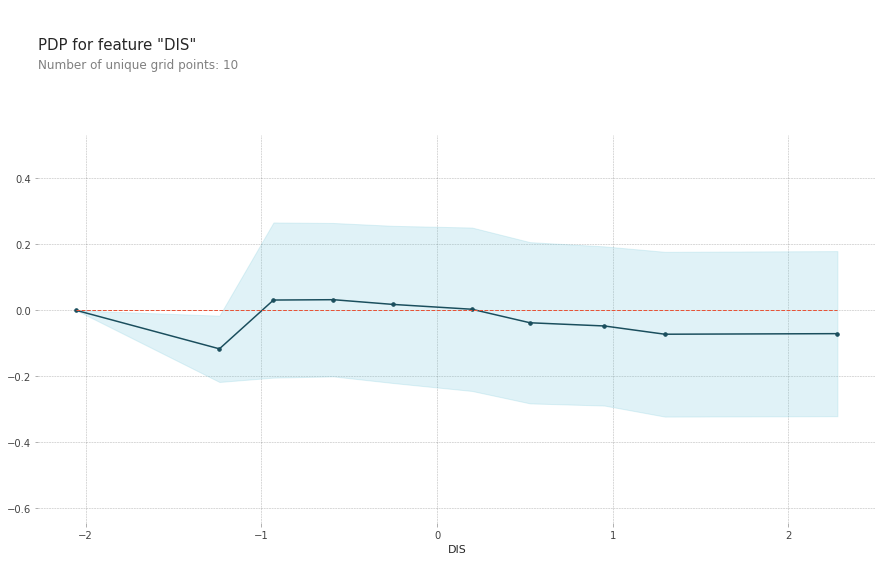

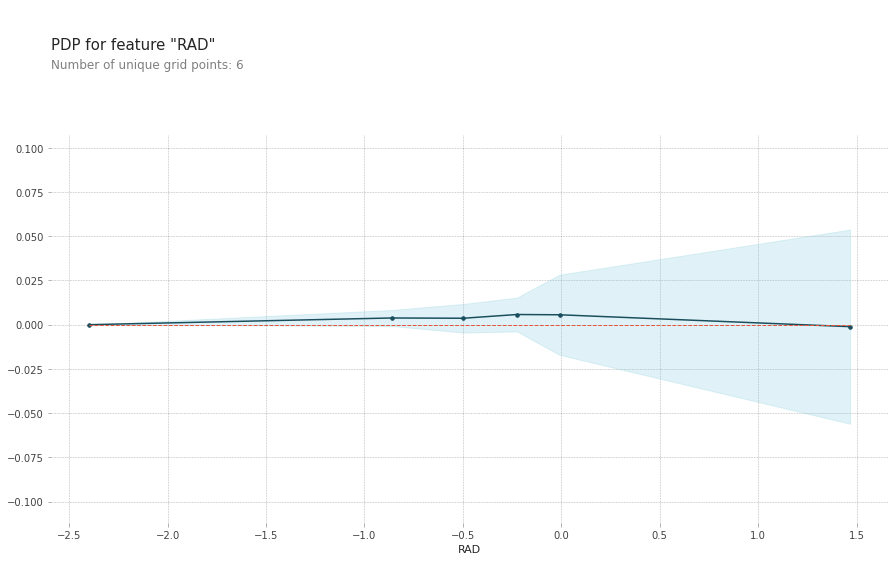

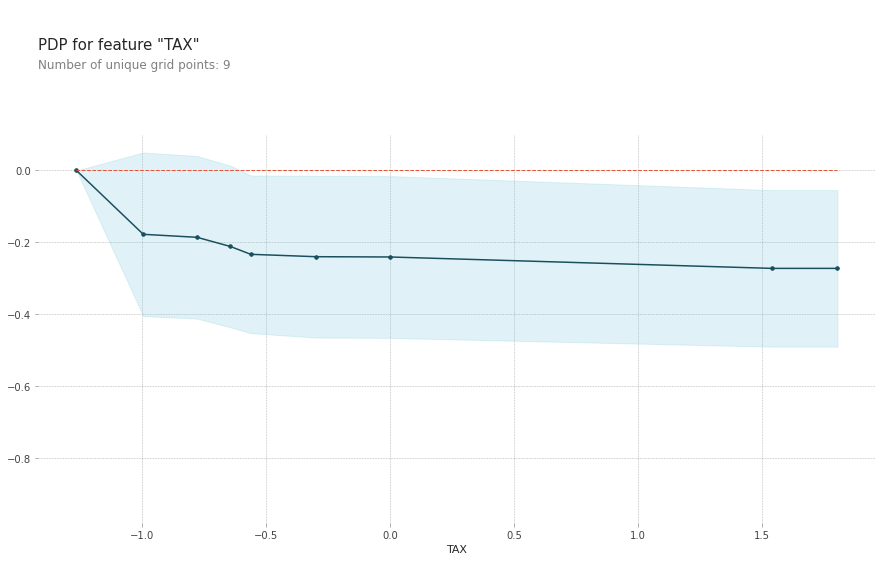

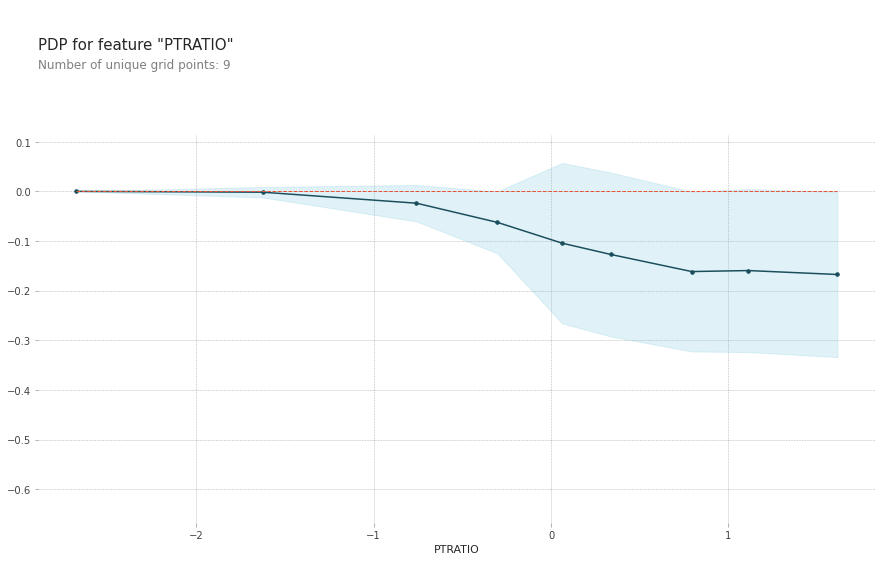

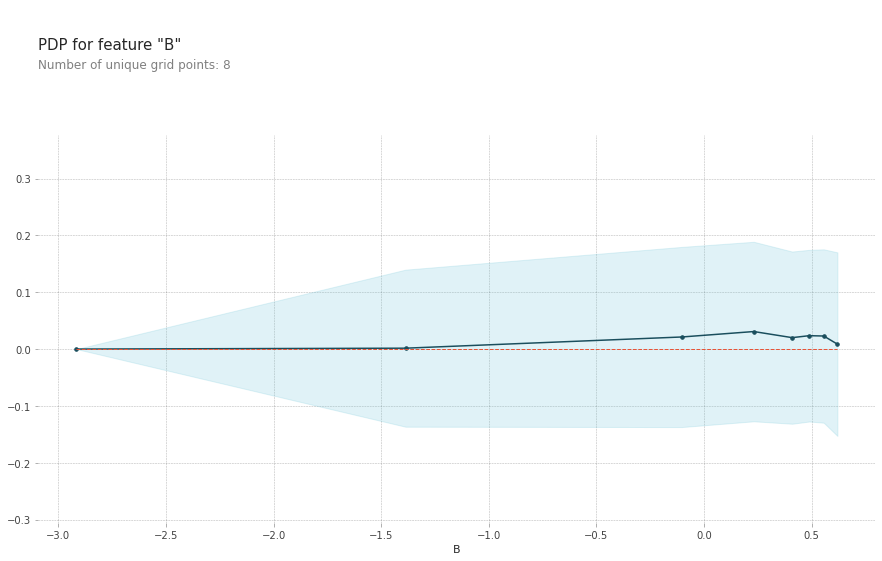

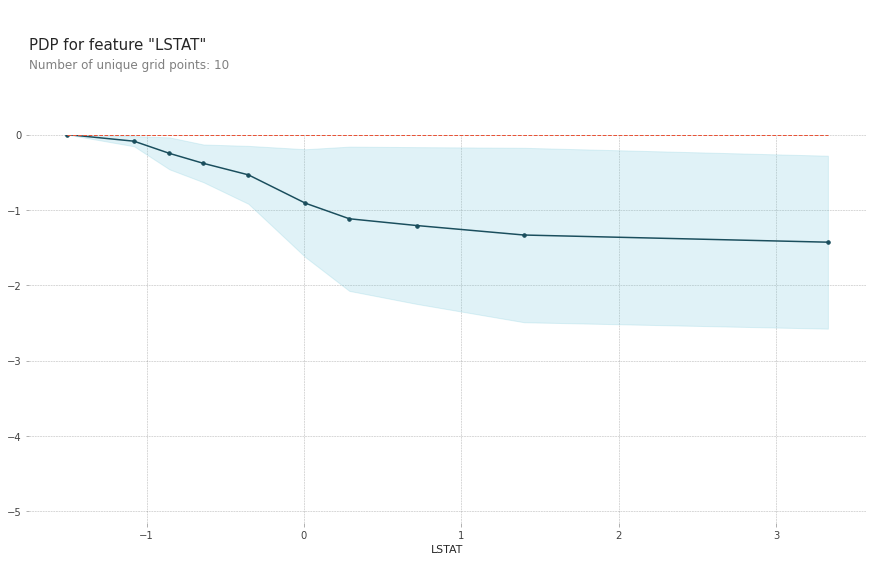

In [52]:
# PDPs
for i in X.columns:    
    pdp_ = pdp.pdp_isolate(model = regr, dataset = X_train_std, model_features = X.columns, feature = i, n_jobs=1) 
    pdp.pdp_plot(pdp_, str(i))
    plt.show()

In [53]:
# Descriptive statistics
df.describe()

CRIM          ZN       INDUS           CHAS         NOX  \
count  506.000000  506.000000  506.000000     506.000000  506.000000   
mean    -1.078712   -9.335468   11.057648 -547075.169159    0.550513   
std      2.201651    6.734418    6.601417  149279.492195    0.104906   
min     -4.430313  -13.373080    2.180000 -587728.314092    0.409000   
25%     -2.891536  -13.373080    5.190000 -587728.314092    0.449000   
50%     -1.471371  -13.373080    9.690000 -587728.314092    0.538000   
75%      1.210442    1.585824   18.100000 -587728.314092    0.624000   
max      2.372201    2.058653   21.890000       0.009797    0.740000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.286486   68.899802    1.065660    1.626373  408.897233   18.500988   
std      0.584444   27.495342    0.430421    0.613294  166.460239    2.028046   
min      5.304000   17.700000    0.368026    0.660260  222.000000   14.700000   
25%      5.885500   45.025000    0.700785    1.258874  279.000000   17.400000   
50%      6.208500   77.500000    1.065900    1.439431  330.000000   19.050000   
75%      6.623500   94.075000    1.452413    2.559899  666.000000   20.200000   
max      7.610000  100.000000    1.760775    2.559899  666.000000   21.000000   

                  B       LSTAT        MEDV  
count  5.060000e+02  506.000000  506.000000  
mean   7.404965e+08   12.486403   22.532806  
std    2.627691e+08    6.589962    9.197104  
min    2.989238e+06    3.700000    5.000000  
25%    7.380613e+08    6.950000   17.025000  
50%    8.605182e+08   11.360000   21.200000  
75%    8.996883e+08   16.955000   25.000000  
max    9.053163e+08   26.820000   50.000000

#**Surrogate Models for XGBregressor Model**

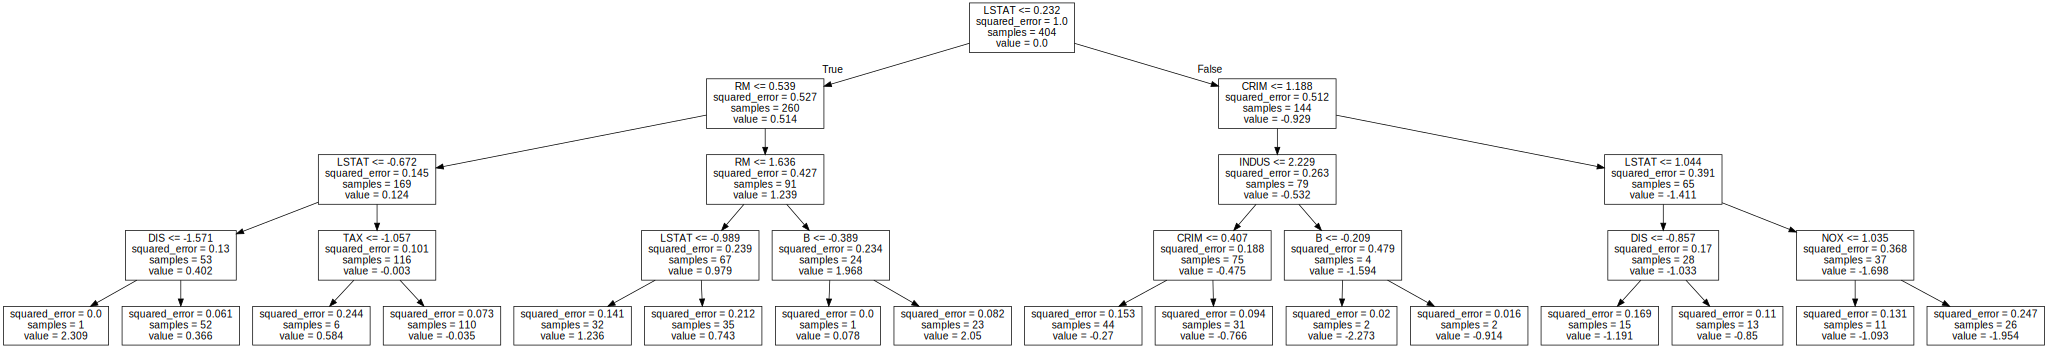

In [54]:
# Decision Tree surrogate for XGBRegressor model
proxy = DecisionTreeRegressor(random_state = 20850,max_depth=4)    # Control the depth of the surrogate model tree here
proxy.fit(X_train_std,y_pred_train_std)

tree_graph = tree.export_graphviz(proxy, out_file = None, feature_names = Xcols)
graphviz.Source(tree_graph)

In [55]:
# Multiple Linear Regression model (for XGBRegressor moel)
import statsmodels.api as sm
model = sm.OLS(y_pred_train_std, X_train_std).fit()
predictions = model.predict(X_train_std) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      0   R-squared (uncentered):                   0.795
Model:                            OLS   Adj. R-squared (uncentered):              0.788
Method:                 Least Squares   F-statistic:                              116.4
Date:                Fri, 18 Mar 2022   Prob (F-statistic):                   1.69e-125
Time:                        12:57:01   Log-Likelihood:                         -253.41
No. Observations:                 404   AIC:                                      532.8
Df Residuals:                     391   BIC:                                      584.8
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------